In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
file_path = '/UAS_AI/[Dataset]_Train_(Perawatan-Pesawat).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [41]:
# Assuming 'label' is the target variable and rest are features
# Select features and target variable
X = data.drop(columns=['id', 'label_mcc', 'label_bnc', 'ttf']) 
y = data['label_bnc'] 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix and other metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall


(array([[3484,   59],
        [  81,  503]], dtype=int64),
 0.966077053549794,
 0.895017793594306,
 0.8613013698630136)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import joblib

# Select features and target variable
X = data.drop(columns=['id', 'label_mcc', 'label_bnc', 'ttf'])  # Exclude non-feature columns
y = data['label_bnc']  # Use 'label_bnc' as the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Predict the test set results
y_pred_continuous = model.predict(X_test)

# Convert continuous predictions to binary using a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_pred_continuous > threshold).astype(int)


In [44]:
# Select features and target variable
# X = data.drop(columns=['id', 'label_mcc', 'label_bnc', 'ttf'])  # Exclude non-feature columns
# y = data['label_bnc']


In [45]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the model and scaler
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Load the dataset
file_path = '/UAS_AI/[Dataset]_Test_(Perawatan-Pesawat).csv'
data = pd.read_csv(file_path)

# Select features and target variable
X = data.drop(columns=['id', 'label_mcc', 'label_bnc', 'ttf'])  # Exclude non-feature columns
y = data['label_bnc']  # Use 'label_bnc' as the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_continuous = model.predict(X_test)

# Convert continuous predictions to binary using a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_pred_continuous > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Save the model and scaler
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model Accuracy: 0.85
Confusion Matrix:
 [[13  3]
 [ 0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.57      1.00      0.73         4

    accuracy                           0.85        20
   macro avg       0.79      0.91      0.81        20
weighted avg       0.91      0.85      0.86        20

Model and scaler saved successfully.


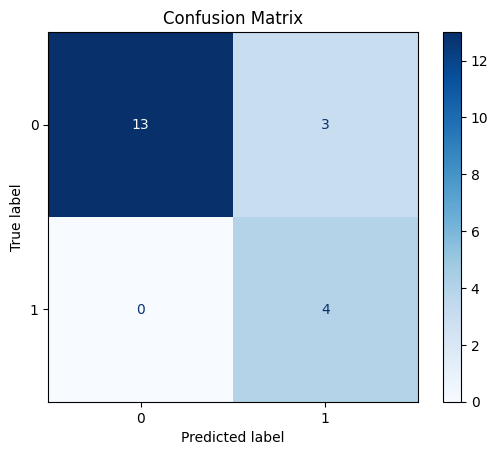

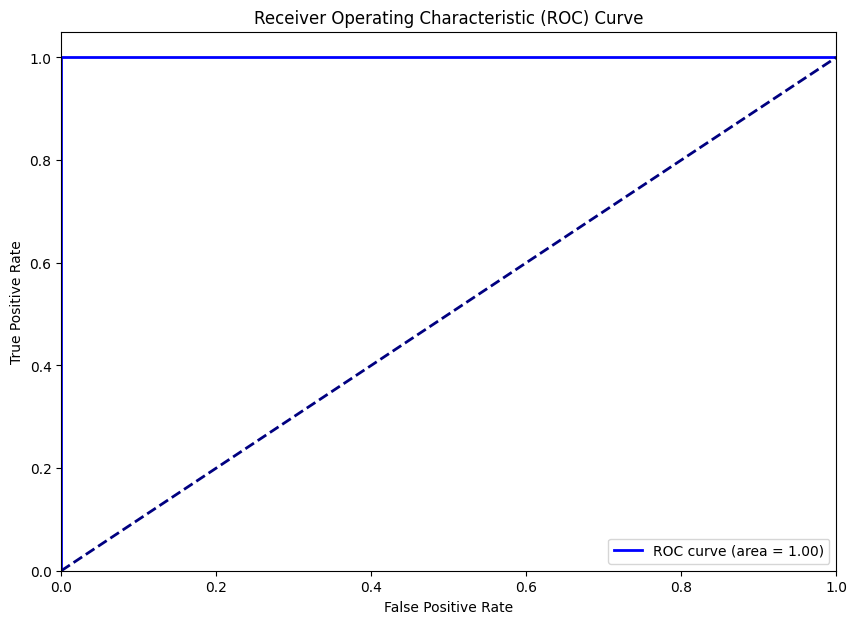

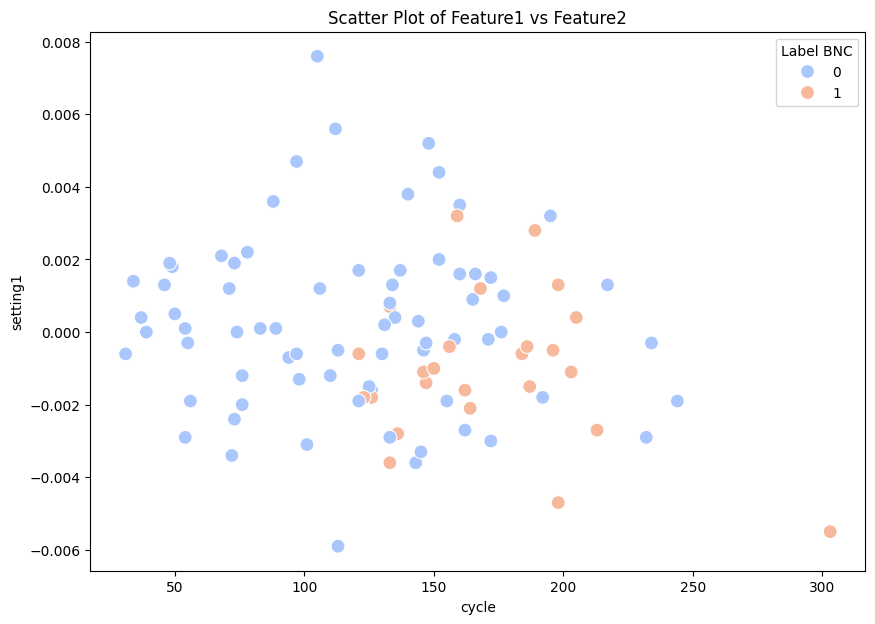

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/UAS_AI/[Dataset]_Test_(Perawatan-Pesawat).csv'
data = pd.read_csv(file_path)

# Select features and target variable
X = data.drop(columns=['id', 'label_mcc', 'label_bnc', 'ttf'])  # Exclude non-feature columns
y = data['label_bnc']  # Use 'label_bnc' as the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming feature1 and feature2 are the names of the features you want to plot
feature1 = X.columns[0]
feature2 = X.columns[1]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Predict the test set results
y_pred_continuous = model.predict(X_test)

# Convert continuous predictions to binary using a threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_pred_continuous > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_continuous)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x=feature1, y=feature2, hue='label_bnc', palette='coolwarm', s=100)
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Label BNC')
plt.show()
